In [1]:
from inspect import ClassFoundException
import numpy as np;
from utils.geometry import *
import math
from utils.datatypes import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json


In [2]:


sim_name = "out_N100_t1000_01-20-2023_00h43m32s"
OPTIONS = {}
with open(f'out/{sim_name}/options.json') as json_file:
    OPTIONS = json.load(json_file)

MAX_TIMESTEP = OPTIONS["OPTIONS_VERTEX_MODEL"]["MAX_TIMESTEP"]

figure_folder = "figures"

In [3]:

arr = np.zeros(MAX_TIMESTEP, dtype=dt_vertex)
with open(f'out/{sim_name}/general.npy', 'rb') as file1:
    arr = np.load(file1)

arr

array([(1.000e-04, 1.000e+00, 200, 300, 100, 1., 20.07346756, False, False, False),
       (2.000e-04, 2.000e+00, 200, 300, 100, 1., 20.06643368, False, False, False),
       (3.000e-04, 3.000e+00, 200, 300, 100, 1., 20.05947927, False, False, False),
       ...,
       (9.990e-02, 9.990e+02, 190, 285,  95, 1., 16.90987369, False, False, False),
       (1.000e-01, 1.000e+03, 190, 285,  95, 1., 16.90781946, False, False, False),
       (1.001e-01, 1.001e+03, 190, 285,  95, 1., 16.9057658 , False, False, False)],
      dtype=[('t', '<f8'), ('iter', '<f8'), ('n_vertices', '<i8'), ('n_borders', '<i8'), ('n_grains', '<i8'), ('total_area', '<f8'), ('energy', '<f8'), ('flip', '?'), ('remove', '?'), ('error', '?')])

In [4]:
df = pd.DataFrame(arr, columns = ['t','iter','n_vertices','n_borders','n_grains','energy','flip','remove','error','total_area'])
df

,t,iter,n_vertices,n_borders,n_grains,energy,flip,remove,error,total_area
0,0.0001,1.0,200,300,100,20.073468,False,False,False,1.0
1,0.0002,2.0,200,300,100,20.066434,False,False,False,1.0
2,0.0003,3.0,200,300,100,20.059479,False,False,False,1.0
3,0.0004,4.0,200,300,100,20.052588,False,False,False,1.0
4,0.0005,5.0,200,300,100,20.045755,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...
996,0.0997,997.0,190,285,95,16.913984,False,False,False,1.0
997,0.0998,998.0,190,285,95,16.911928,False,False,False,1.0
998,0.0999,999.0,190,285,95,16.909874,False,False,False,1.0
999,0.1000,1000.0,190,285,95,16.907819,False,False,False,1.0


In [5]:
df["total_area"].value_counts()

1.0    292
1.0    158
1.0    147
1.0    144
1.0     77
1.0     69
1.0     38
1.0     22
1.0     20
1.0     14
1.0     14
1.0      3
1.0      3
Name: total_area, dtype: int64

## AREA OF GRAINS

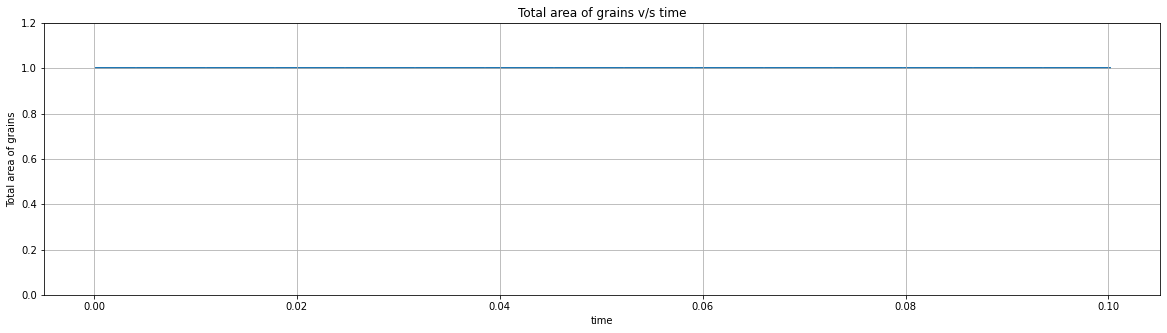

In [6]:
ttile = "Total area of grains v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 5))
    plt.scatter(df["t"], df["total_area"], marker=",", s=1)
    plt.ylim(0, 1.2)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('Total area of grains')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/total_area.png', dpi=300)
    plt.show()



## GRAINS

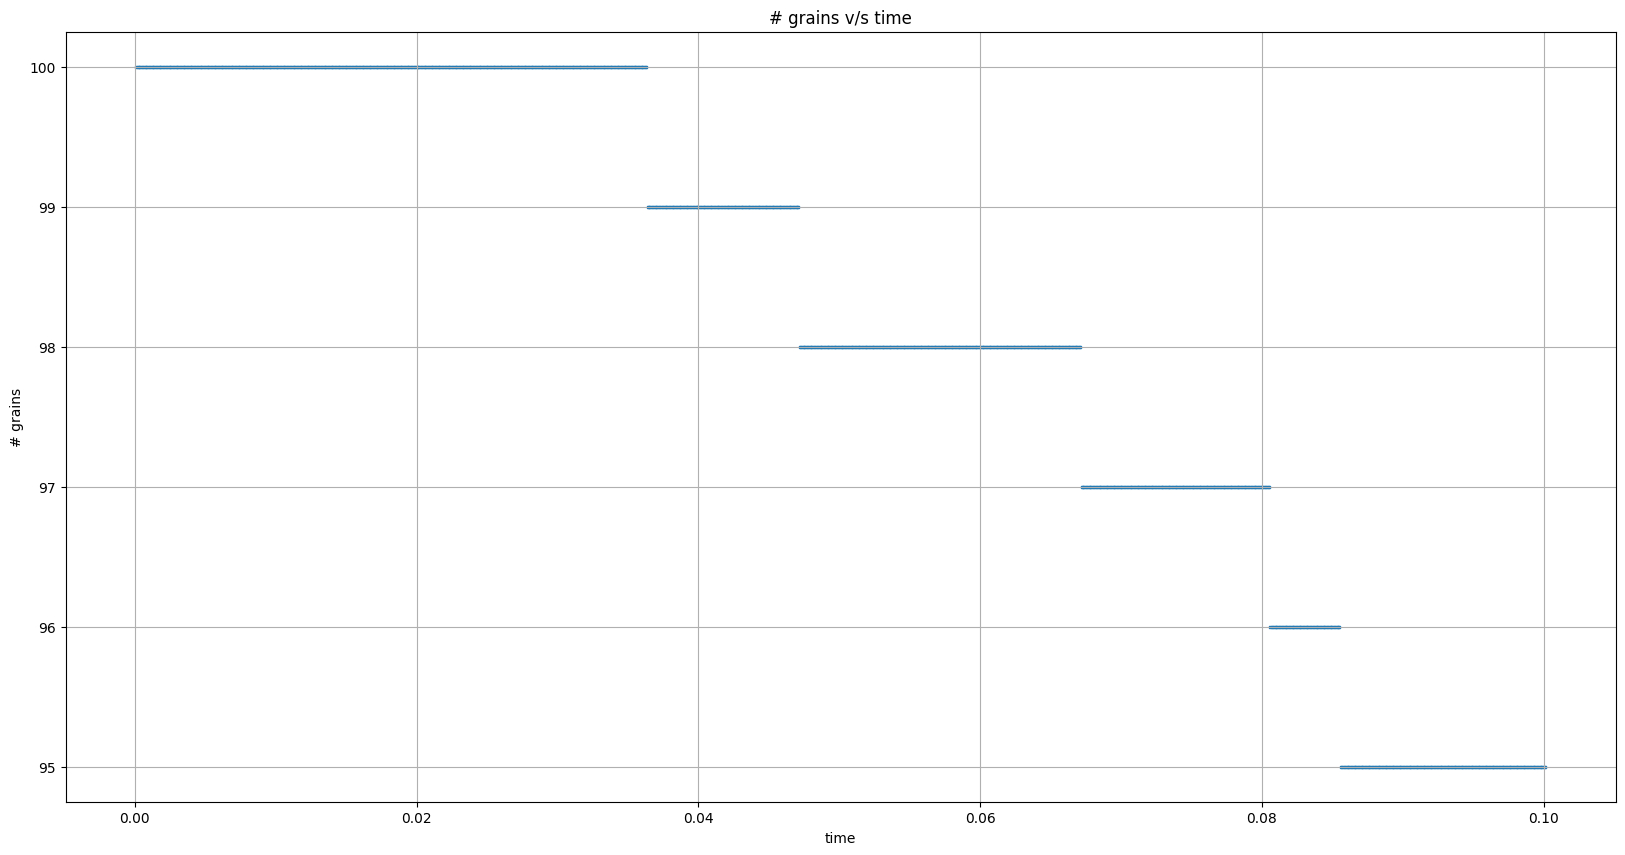

In [7]:
ttile = "# grains v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_grains"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# grains')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_grains.png', dpi=300)
    plt.show()


## VERTICES

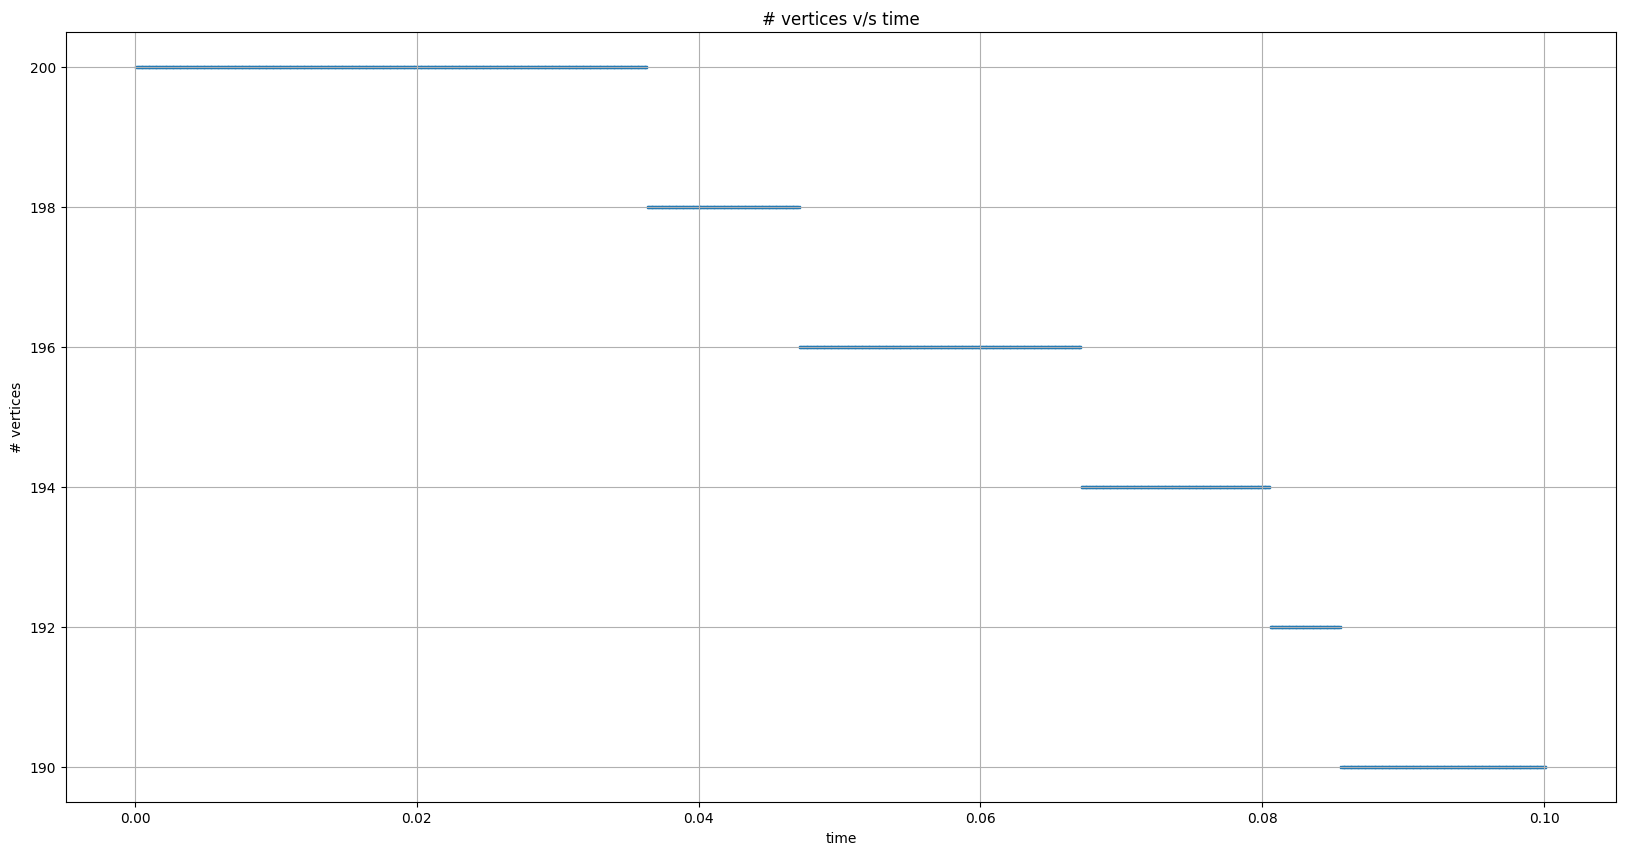

In [8]:
ttile = "# vertices v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_vertices"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# vertices')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_vertices.png', dpi=300, bbox_inches='tight')
    plt.show()

## BORDERS

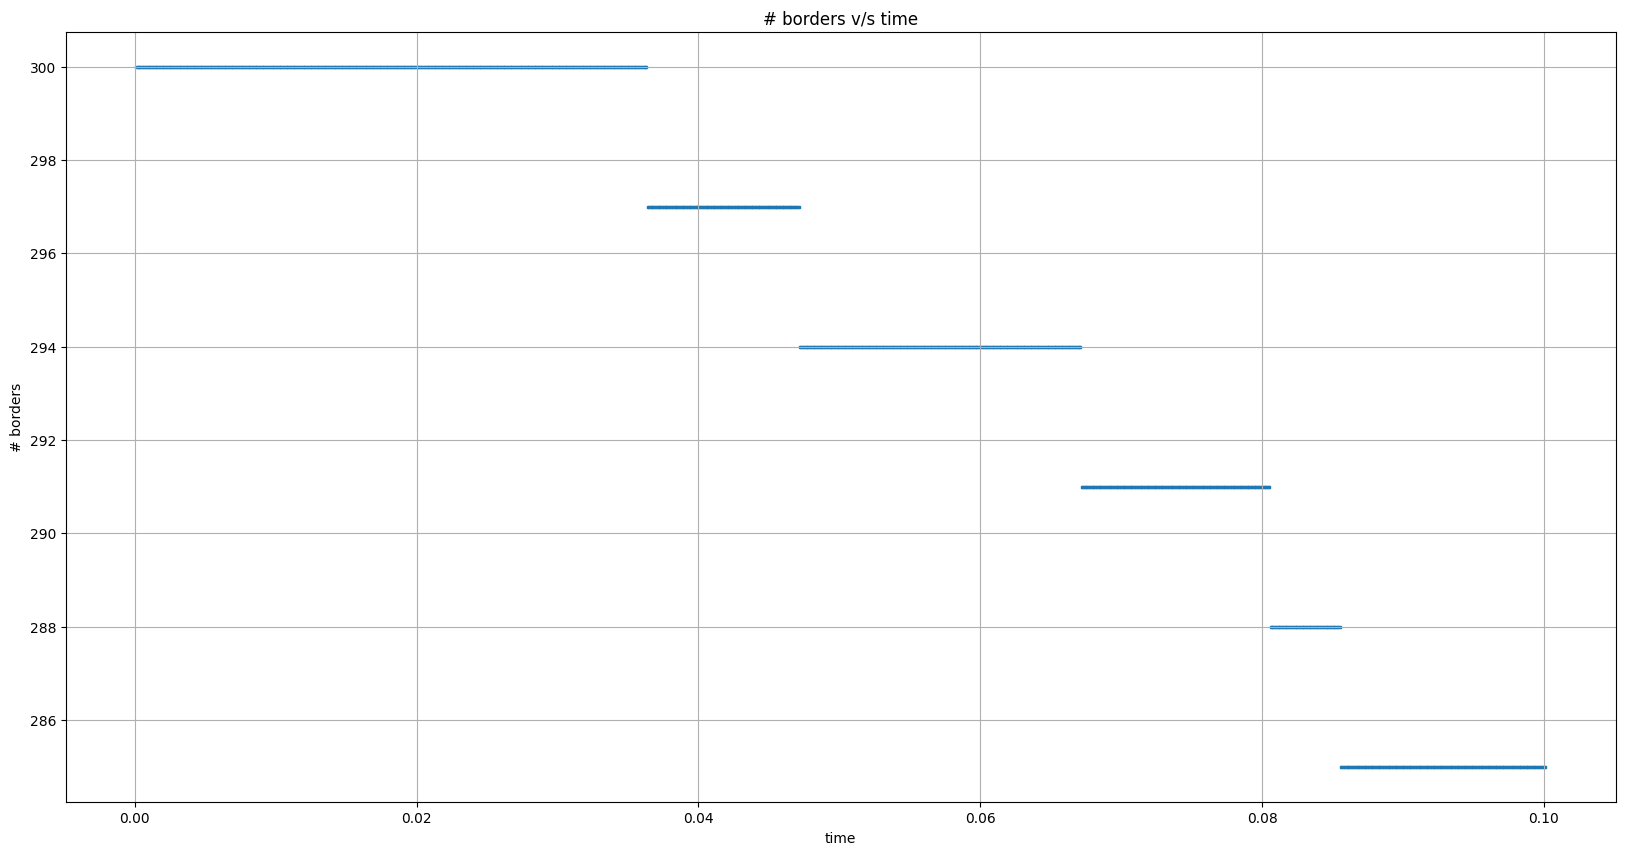

In [9]:

ttile = "# borders v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_borders"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# borders')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_borders.png', dpi=300)
    plt.show()


## GRAINS, VERTICES, BORDERS

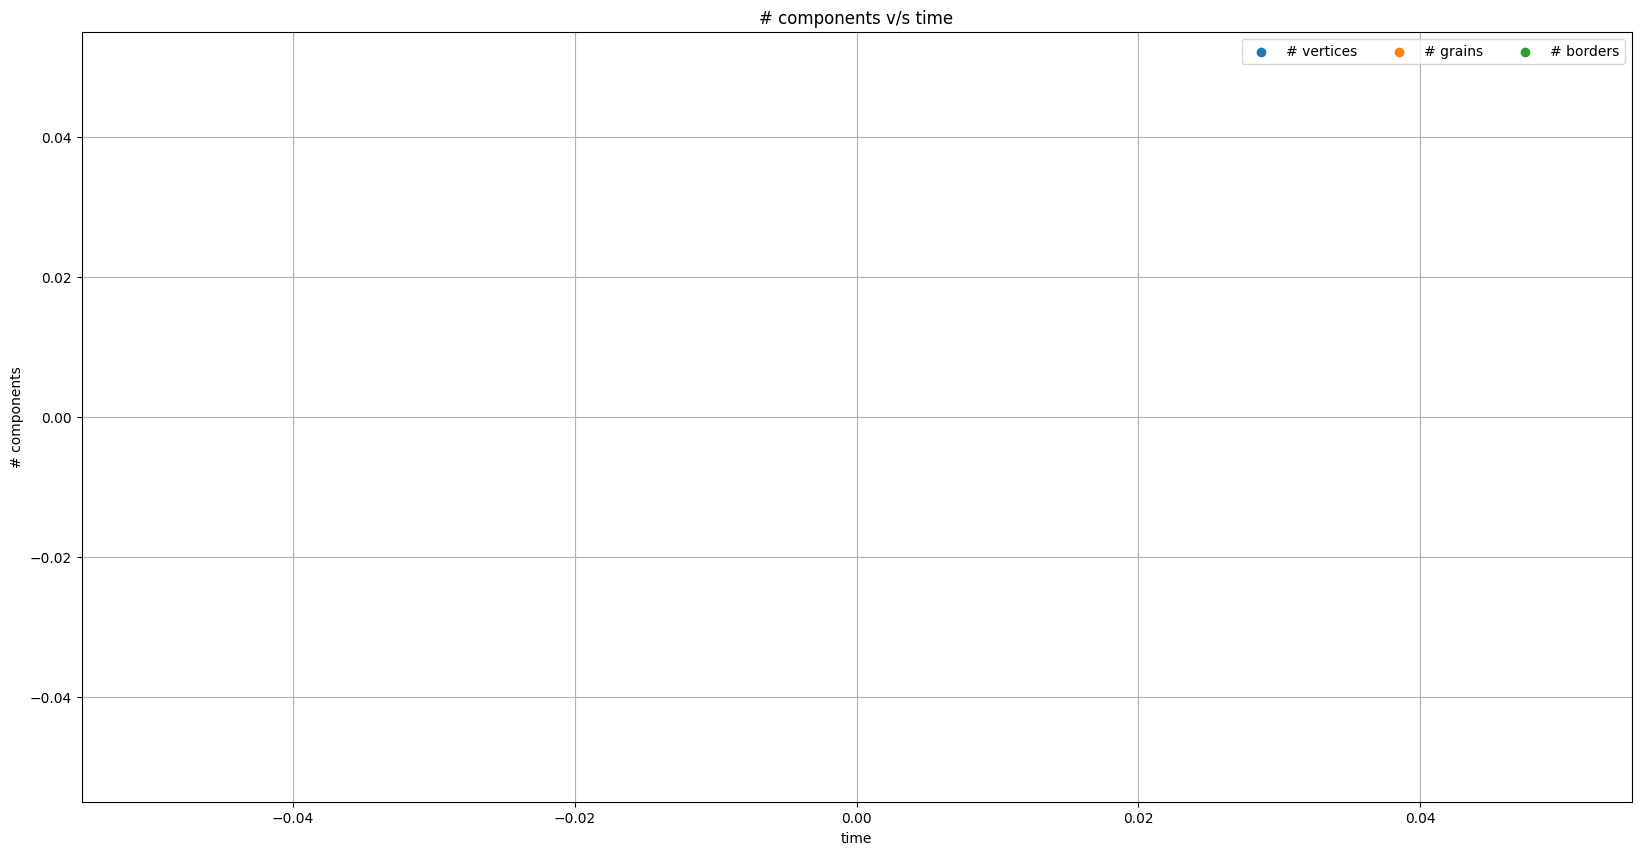

In [10]:

ttile = "# components v/s time"
df_aux = df[ (df.iter % 10 == 0) & (df.iter > 1000) & (df.iter < 2000) ]
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df_aux["t"], df_aux["n_vertices"], marker="o", label="# vertices") # s=10
    plt.scatter(df_aux["t"], df_aux["n_grains"], marker="o", label="# grains")
    plt.scatter(df_aux["t"], df_aux["n_borders"], marker="o", label="# borders")
    plt.legend(ncol=3, loc="upper right")
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# components')
    plt.savefig(f'{figure_folder}/n_grains_vertices_borders.png', dpi=300)
    #plt.figure(tight_layout=True)
    plt.show()



## ENERGY

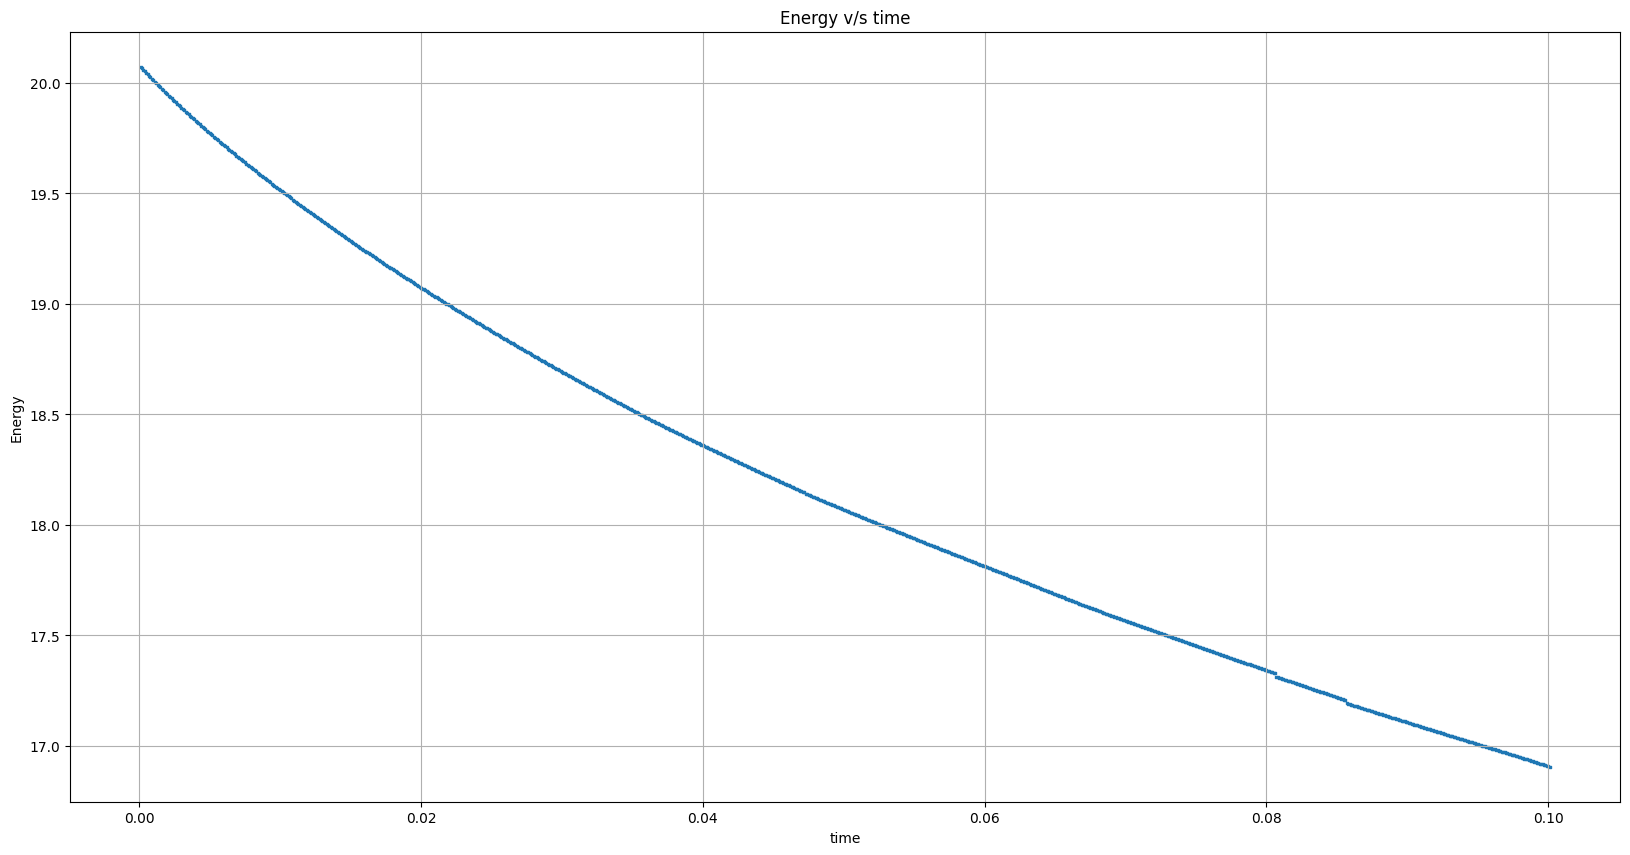

In [11]:

ttile = "Energy v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["energy"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('Energy')
    plt.savefig(f'{figure_folder}/scatter_energy.png', dpi=300)
    #plt.figure(tight_layout=True)
    plt.show()